# Import libraries

In [1]:
import os
import json
import datetime
import pandas as pd
from collections import Counter
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the reactions file

In [2]:
file= "comments_and_reactions\posts_and_comments.json"
data = json.load(open(file, 'r')) 

# Extract reactions and years from comments file

In [3]:
reactions=[]
timestamp=[]
for i in range(len(data["reactions_v2"])):
    if 'data' in data["reactions_v2"][i]:
        reactions.append(data["reactions_v2"][i]["data"][0]["reaction"]["reaction"])
        ts=datetime.fromtimestamp(data["reactions_v2"][i]["timestamp"])
        timestamp.append(ts.year)

# Create the reactions DataFrame

In [4]:
df = pd.DataFrame(reactions,columns =['reactions_v2'])
df['years']=timestamp
df

,reactions_v2,years
0,LIKE,2013
1,LIKE,2013
2,LIKE,2013
3,LIKE,2013
4,LIKE,2013
...,...,...
13576,LOVE,2022
13577,LOVE,2022
13578,LOVE,2022
13579,LOVE,2022


# Display reactions frequency

In [5]:
reactions_collection = Counter(list(df.reactions_v2))
freq_reactions_df = pd.DataFrame(reactions_collection.most_common(6))
freq_reactions_df.columns = ['frequently_used_reactions','count']
freq_reactions_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

,frequently_used_reactions,count
0,LIKE,8924
1,HAHA,2244
2,LOVE,1974
3,SORRY,317
4,ANGER,72
5,WOW,49


<AxesSubplot:title={'center':'Frequently used reactions'}, xlabel='frequently_used_reactions'>

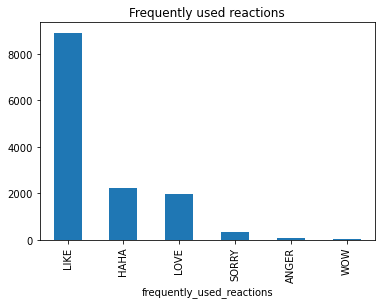

In [6]:
freq_reactions_df.groupby('frequently_used_reactions').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Frequently used reactions')

# Conclusion

The LIKE reaction is the most used because in 2016, when I was doing a lot of reactions, it was the only one that existed.

# Count the number of reactions each month 

In [7]:
date=[]
dataa=[]
for i in range(len(data["reactions_v2"])):
    if 'data' in data["reactions_v2"][i]:
        date.append(str(datetime.fromtimestamp(data["reactions_v2"][i]["timestamp"])))
        dataa.append(data["reactions_v2"][i]["data"][0]["reaction"]["reaction"])

In [8]:
dff = pd.DataFrame({'date': date, 'reactions': dataa} )
dff

,date,reactions
0,2013-09-15 15:34:50,LIKE
1,2013-09-15 15:35:07,LIKE
2,2013-09-20 13:31:14,LIKE
3,2013-09-20 13:31:15,LIKE
4,2013-09-20 13:31:18,LIKE
...,...,...
13576,2022-02-14 21:31:15,LOVE
13577,2022-02-15 14:09:30,LOVE
13578,2022-02-15 14:13:42,LOVE
13579,2022-02-15 14:36:09,LOVE


In [9]:
dff.index = pd.to_datetime(dff['date'])

In [10]:
reactions_counts= dff['reactions'].resample('MS').size()
reactions_counts

date
2013-09-01     12
2013-10-01    558
2013-11-01    583
2013-12-01    355
2014-01-01    252
             ... 
2021-10-01    547
2021-11-01    291
2021-12-01    163
2022-01-01     86
2022-02-01     54
Freq: MS, Name: reactions, Length: 102, dtype: int64

# Display results  

D:\Users\yousra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


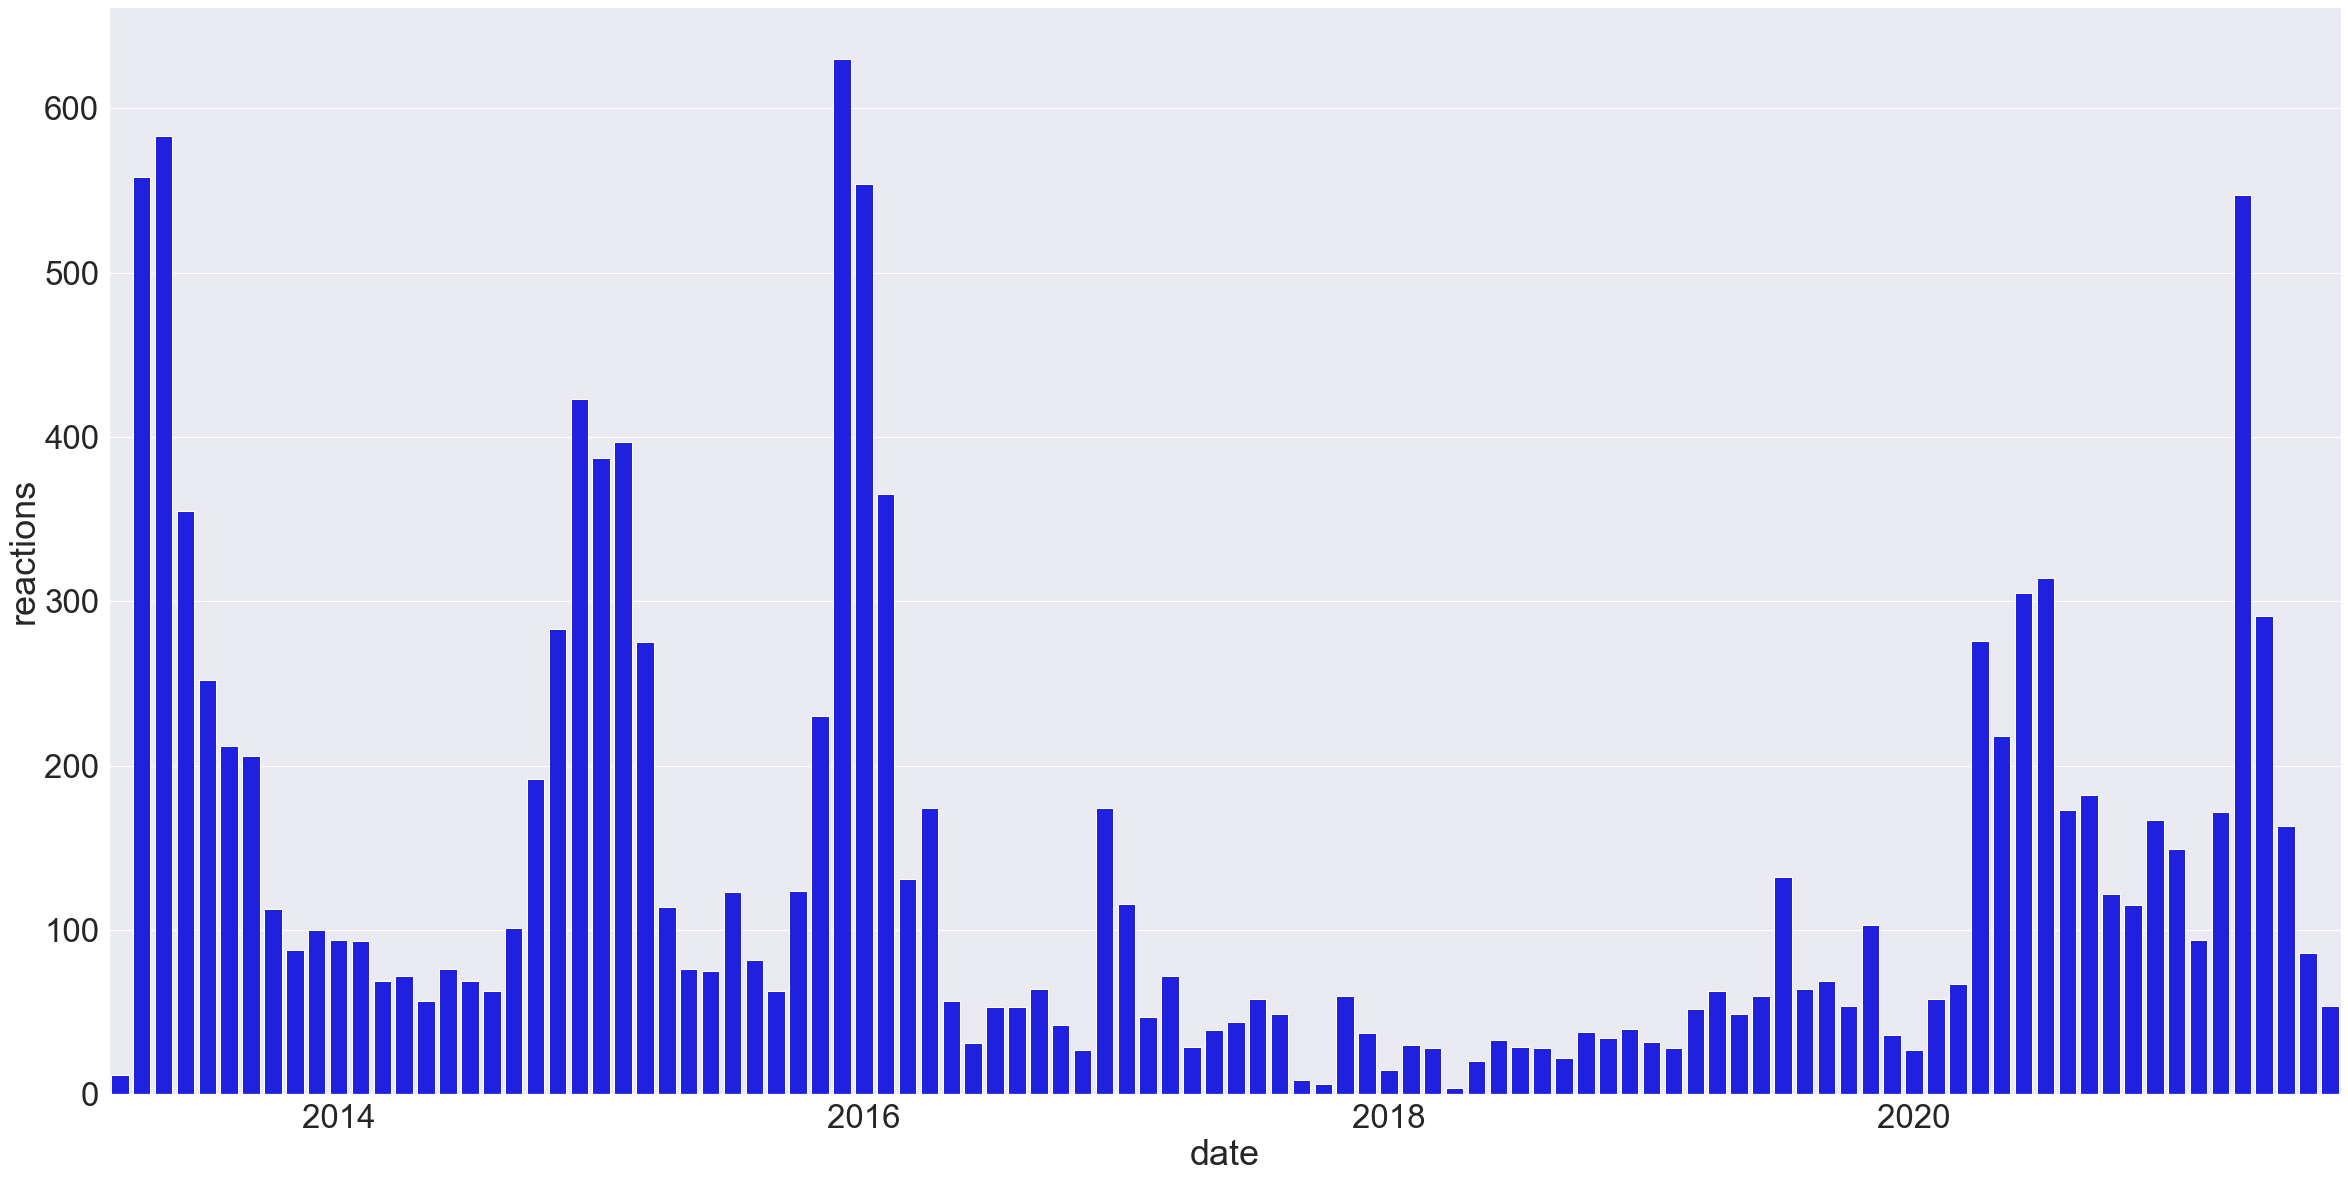

In [11]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = reactions_counts.index

#create bar plot
sns.barplot(x_labels, reactions_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

# Conclusion

The period from 2017 to 2019 I was not doing much reaction in the publications. But since 2020 the period of confinement I start to be very active as the years 2013 to 2016.